In [1]:
import pandas as pd

In [2]:
# read data
df = pd.read_csv('Data_drop_year.csv')
df

,Name,Time,Store,Comment,Aspect,polarity,'data integration','marketing and communication','technology','payment and checkout','shopping experience','unemployment','product available and store design','price and value','general','privacy and security'
0,Jenae K.,2018-06-01,Amazon Go,store awesome super cool concept definitley se...,"["" 'data integration'"", "" 'marketing and commu...",positive,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jenae K.,2018-06-01,Amazon Go,scan app enter store grab whatever want shelf ...,"["" 'technology'"", "" 'payment and checkout'""]",positive,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jenae K.,2018-06-01,Amazon Go,product shelf sensor know grab item,"["" 'technology'""]",neutral,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jenae K.,2018-06-01,Amazon Go,crazy no cashier no line,"["" 'payment and checkout'""]",negative,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jenae K.,2018-06-01,Amazon Go,super simple course still worker ensure entran...,"["" 'technology'"", "" 'shopping experience'"", "" ...",positive,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87641,Melissa C.,2020-08-09,Walmart,time worth stop come unless,"["" 'price and value'""]",negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87642,Mark H.,2020-09-09,Walmart,lose shipment twice row delay order two week s...,"["" 'technology'"", "" 'unemployment'""]",negative,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87643,Mark H.,2020-09-09,Walmart,call refund tell would take day get money back,"["" 'price and value'"", "" 'payment and checkout'""]",neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
87644,Lorna B.,2021-09-09,Walmart,far too many grocery available store not avail...,"["" 'technology'"", "" 'general'""]",neutral,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [4]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
printmd("**Sample data:**")
df.head()

Number of rows in data = 87646
Number of columns in data = 16




**Sample data:**

,Name,Time,Store,Comment,Aspect,polarity,'data integration','marketing and communication','technology','payment and checkout','shopping experience','unemployment','product available and store design','price and value','general','privacy and security'
0,Jenae K.,2018-06-01,Amazon Go,store awesome super cool concept definitley se...,"["" 'data integration'"", "" 'marketing and commu...",positive,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jenae K.,2018-06-01,Amazon Go,scan app enter store grab whatever want shelf ...,"["" 'technology'"", "" 'payment and checkout'""]",positive,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jenae K.,2018-06-01,Amazon Go,product shelf sensor know grab item,"["" 'technology'""]",neutral,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jenae K.,2018-06-01,Amazon Go,crazy no cashier no line,"["" 'payment and checkout'""]",negative,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jenae K.,2018-06-01,Amazon Go,super simple course still worker ensure entran...,"["" 'technology'"", "" 'shopping experience'"", "" ...",positive,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
categories = list(df.columns.values)
categories = categories[6:]
print(categories)

[" 'data integration'", " 'marketing and communication'", " 'technology'", " 'payment and checkout'", " 'shopping experience'", " 'unemployment'", " 'product available and store design'", " 'price and value'", " 'general'", " 'privacy and security'"]


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(61352, 16)
(26294, 16)


In [7]:
train_text = train['Comment']
test_text = test['Comment']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [9]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Comment','Name','Time','Store'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Comment','Name','Time','Store'], axis=1)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [11]:
%%time

# create a pipeline for ensemble model
ensemble = Pipeline([
        
    ('clf', OneVsRestClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(solver='lbfgs', max_iter=1000)),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier(n_estimators=100))
    ], voting='soft')))
])


for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training ensemble model on train data
    ensemble.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = ensemble.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")
        

**Processing  'data integration' comments...**

Test accuracy is 0.9774473263862478




**Processing  'marketing and communication' comments...**

Test accuracy is 0.9659237848938922




**Processing  'technology' comments...**

Test accuracy is 0.9105119038563931




**Processing  'payment and checkout' comments...**

Test accuracy is 0.9173956035597475




**Processing  'shopping experience' comments...**

Test accuracy is 0.9292614284627672




**Processing  'unemployment' comments...**

Test accuracy is 0.9405567810146802




**Processing  'product available and store design' comments...**

Test accuracy is 0.9450825283334601




**Processing  'price and value' comments...**

Test accuracy is 0.9326081995892599




**Processing  'general' comments...**

Test accuracy is 0.9092188331938845




**Processing  'privacy and security' comments...**

Test accuracy is 0.9440176466113942


CPU times: total: 5h 45min 32s
Wall time: 5h 36min 15s


# Test ROC

In [3]:
#import train tesst split
from sklearn.model_selection import train_test_split

# create train and test data
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df.drop(['Name','Time','Store','Comment','Aspect','polarity'],axis=1), test_size=0.2, random_state=42)

In [4]:
y_train.head()

,'data integration','marketing and communication','technology','payment and checkout','shopping experience','unemployment','product available and store design','price and value','general','privacy and security'
1647,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52561,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87221,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# create a pipeline for logistic regression with onevsrest classifier and tfidf vectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
#import voting classifier
from sklearn.ensemble import VotingClassifier
#import knn
from sklearn.neighbors import KNeighborsClassifier
#impoert decision tree
from sklearn.tree import DecisionTreeClassifier
#import random forest
from sklearn.ensemble import RandomForestClassifier




# import roc_auc_score
from sklearn.metrics import roc_auc_score

# create a pipeline for ensemble model
ensemble = Pipeline([

    ('tfidf', TfidfVectorizer(max_df=0.8, max_features=5000)),
    ('clf', OneVsRestClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(solver='lbfgs', max_iter=1000)),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),   
        ('rf', RandomForestClassifier(n_estimators=100))
    ], voting='soft')))
])


In [15]:
# fit the training dataset on the pipeline
ensemble.fit(X_train,y_train)

# make predictions and get the accuracy
predictions = ensemble.predict(X_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

# roc_auc_score
print("roc_auc_score = ",roc_auc_score(y_test,predictions))

Accuracy =  0.7349115801483171
roc_auc_score =  0.8790207604756685


In [29]:
#print roc_auc_score for train and test data
from sklearn.metrics import roc_auc_score
print("roc_auc_score for train data = ",roc_auc_score(y_train,ensemble.predict(X_train)))
print("roc_auc_score for test data = ",roc_auc_score(y_test,predictions))

        

roc_auc_score for train data =  0.9834539968553473
roc_auc_score for test data =  0.8790207604756685


In [19]:
y_train_pred_proba =    ensemble.predict_proba(X_train)
y_test_pred_proba = ensemble.predict_proba(X_test)

In [17]:
roc_auc_score_train = roc_auc_score(y_train, y_train_pred_proba,average='weighted')
roc_auc_score_test = roc_auc_score(y_test, y_test_pred_proba,average='weighted')

print("ROC AUC Score Train:", roc_auc_score_train)
print("ROC AUC Score Test:", roc_auc_score_test)

ROC AUC Score Train: 0.9998346548094514
ROC AUC Score Test: 0.9838663659687286


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='roc_auc')
print(scores)

[0.9812534  0.98198158 0.98282051 0.98130981 0.98238351 0.98220257
 0.98273188 0.98138755 0.98154921 0.98179432]


In [21]:
print ("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ROC_AUC: 0.98 (+/- 0.00)


In [22]:
from sklearn.model_selection import cross_val_score
accuracy_score = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='accuracy')
print(accuracy_score)

print ("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_score.mean(), accuracy_score.std() * 2))

[0.71819738 0.72461495 0.72575585 0.71833999 0.72047918 0.72732459
 0.72200827 0.72971045 0.71473399 0.72243617]
Accuracy: 0.72 (+/- 0.01)


In [34]:
#cross validation for calculate recall score for multilable indicator
from sklearn.model_selection import cross_val_score
recall_score = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='recall_samples')

print(recall_score)

print ("Recall Score: %0.2f (+/- %0.2f)" % (recall_score.mean(), recall_score.std() * 2))

#cross validation for calculate f1 score
from sklearn.model_selection import cross_val_score
f1_score = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='f1_samples')
print(f1_score)

print ("F1 Score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

#cross validation for calculate precision score
from sklearn.model_selection import cross_val_score
precision_score = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='precision_samples')

print(precision_score)

print ("Precision Score: %0.2f (+/- %0.2f)" % (precision_score.mean(), precision_score.std() * 2))


[0.87378949 0.87250937 0.88099313 0.87002757 0.8745888  0.87464585
 0.88008741 0.87726328 0.87642276 0.87812893]
Recall Score: 0.88 (+/- 0.01)
[0.86313309 0.86124625 0.86880958 0.86144999 0.86230526 0.86179101
 0.86553788 0.86916127 0.86285237 0.86316695]
F1 Score: 0.86 (+/- 0.01)


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being

[0.88678218 0.88828437 0.89431213 0.8865849  0.88727657 0.88884294
 0.88977321 0.89499596 0.88911235 0.88696334]
Precision Score: 0.89 (+/- 0.01)


In [ ]:
#cross validation for calculate recall score for multilable indicator
from sklearn.model_selection import cross_val_score
accuracy_score = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='accuracy')
print(accuracy_score)


In [12]:
# cross validation
from sklearn.model_selection import cross_val_score

# cross_validate 
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro', 'roc_auc_ovr']
scores = cross_validate(ensemble, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)
# print output
print('Accuracy: ', scores['test_accuracy'].mean())
print('F1: ', scores['test_f1_macro'].mean())
print('Recall: ', scores['test_recall_macro'].mean())
print('Precision: ', scores['test_precision_macro'].mean())
print('AUC: ', scores['test_roc_auc'].mean())

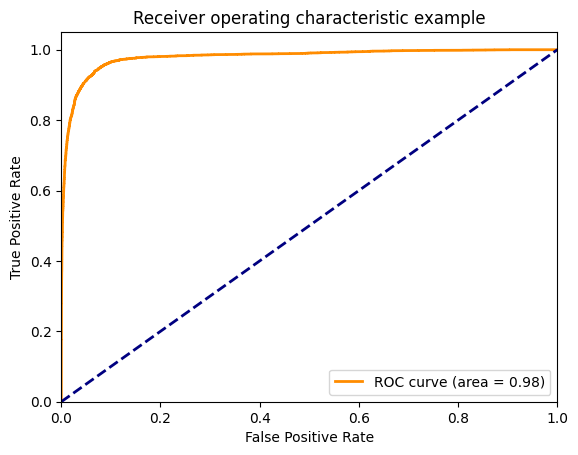

In [31]:
#draw roc curve for each class 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,6):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_test_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_test.values.ravel(), y_test_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    

DECISION TREE

In [28]:
#USING PIPELINE FOR DECISION TREE WITH TFIDF VECTORIZER AND ONEVSREST CLASSIFIER 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

# import roc_auc_score
from sklearn.metrics import roc_auc_score

In [ ]:
# new train and test data
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df.drop(['Name','Time','Store','Comment','Aspect','polarity'],axis=1), test_size=0.2, random_state=42)
y_train.head()

In [ ]:

# vectorize the text 
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(max_df=0.8, max_features=5000, ngram_range=(1,2))

# fit and transform train and test features
X_train_tfidf = TfidfVectorizer.fit_transform(X_train)
X_test_tfidf = TfidfVectorizer.transform(X_test)

    
# cross validation for logistic regression with onevsrest classifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

# onerest classifier with kfold cv
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=0), n_jobs=-1)
scores = cross_val_score(clf, X_train_tfidf, y_train, cv=10, scoring='roc_auc')


from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc')
print(scores)

print ("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    


In [ ]:
#Drawing multiple ROC-Curves in a single plot
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


X = df['Comment']
y =  df.drop(['Name','Time','Store','Comment','Aspect','polarity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, axis=1,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Instantiate the classfiers of logistic regression, knn, decision tree, random forest and ensemble model with tfidf vectorizer and onevsrest classifier
# and make a list
classifiers = Pipeline ([
    ('tfidf', TfidfVectorizer(max_df=0.8, max_features=5000)),
    ('clf', OneVsRestClassifier(LogisticRegression(random_state=42))),
    ('clf', OneVsRestClassifier(KNeighborsClassifier())),
    ('clf', OneVsRestClassifier(DecisionTreeClassifier(random_state=42))),
    ('clf', OneVsRestClassifier(RandomForestClassifier(random_state=42))),
    ('clf', OneVsRestClassifier(VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                                                ('knn', KNeighborsClassifier()),
                                                ('dt', DecisionTreeClassifier(random_state=42)),
                                                ('rf', RandomForestClassifier(random_state=42))],
                voting='soft'))),
])

In [ ]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:

    model = cls.fit(X_train, y_train)

    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)

    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

In [ ]:
# Set name of the classifiers as index labels

result_table.set_index('classifiers', inplace=True)

# Plot the figure


fig = plt.figure(figsize=(8,6))

for i in result_table.index:


    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))





plt.plot([0,1], [0,1], color='orange', linestyle='--')


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)



plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)



plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

CONFUSION MATRIX

In [1]:
#import confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))

NameError: name 'y_test' is not defined